### SIMPLE RETURNS

In [1]:
import os
import numpy as np
import pandas as pd
import yahoo_fin.stock_info as si
from datetime import datetime, timedelta
from MCPortfolioSimulator_SR import PortfolioSimulator

# Prepare an empty DataFrame to concatenate all asset DataFrames
all_assets_df = pd.DataFrame()

# List of assets to fetch data for
asset_list = ["NVDA", "TSLA", "AMZN", "META", "ADBE", "CRM", "AVGO", "LLY", "^TNX", "WELL"]  # Continue with your list of assets

# Define the start and end dates for fetching the data
end_date = datetime.now()
start_date = end_date - timedelta(days=10*365)  # Approximately 10 years

# Fetch and concatenate data for each asset
for asset in asset_list:
    print(f"Fetching data for {asset}...")
    df = si.get_data(asset, start_date=start_date, end_date=end_date, index_as_date=True)
    
    # Standardize column names
    df.rename(columns={
        'open': 'open', 'high': 'high', 'low': 'low', 'close': 'close',
        'adjclose': 'adj close', 'volume': 'volume'
    }, inplace=True)
    
    # Adjust DataFrame column names for multi-level indexing
    if all_assets_df.empty:
        all_assets_df = df
        all_assets_df.columns = pd.MultiIndex.from_product([[asset], all_assets_df.columns])
    else:
        df.columns = pd.MultiIndex.from_product([[asset], df.columns])
        all_assets_df = pd.concat([all_assets_df, df], axis=1)

# Drop any rows with missing data to ensure consistency
all_assets_df.dropna(inplace=True)

# Display the first few rows of the consolidated data
display(all_assets_df)

# Monte Carlo simulation configuration
weights = [.10, .10, .10, .10, .10, .10, .10, .10, .15, .05]  # Adjust based on the number of assets

# Initialize the PortfolioSimulator
sim_returns = PortfolioSimulator(
    portfolio_data=all_assets_df,
    weights=weights,
    num_simulation=500,
    num_trading_days=252*30,
)

# # Display the first few rows of the portfolio data
display(sim_returns.portfolio_data)

Fetching data for NVDA...
Fetching data for TSLA...
Fetching data for AMZN...
Fetching data for META...
Fetching data for ADBE...
Fetching data for CRM...
Fetching data for AVGO...
Fetching data for LLY...
Fetching data for ^TNX...
Fetching data for WELL...


NVDA                                                  \
                  open        high         low       close   adj close   
2014-05-07    4.562500    4.605000    4.517500    4.567500    4.328398   
2014-05-08    4.550000    4.697500    4.527500    4.625000    4.382888   
2014-05-09    4.485000    4.527500    4.427500    4.512500    4.276274   
2014-05-12    4.522500    4.655000    4.520000    4.645000    4.401840   
2014-05-13    4.582500    4.657500    4.555000    4.570000    4.330765   
...                ...         ...         ...         ...         ...   
2024-04-29  875.950012  879.919983  852.659973  877.570007  877.570007   
2024-04-30  872.400024  888.190002  863.000000  864.020020  864.020020   
2024-05-01  850.770020  860.000000  812.549988  830.409973  830.409973   
2024-05-02  844.489990  862.369995  832.000000  858.169983  858.169983   
2024-05-03  877.890015  892.809998  870.400085  887.890015  887.890015   

                                     TSLA                          ...  \
                volume ticker        open        high         low  ...   
2014-05-07  29390000.0   NVDA   13.976000   14.013333   13.150000  ...   
2014-05-08  43272800.0   NVDA   12.133333   12.960000   11.866667  ...   
2014-05-09  53953200.0   NVDA   11.990667   12.226667   11.814667  ...   
2014-05-12  29985600.0   NVDA   12.258000   12.479333   11.992000  ...   
2014-05-13  22110400.0   NVDA   12.250667   12.756000   12.200000  ...   
...                ...    ...         ...         ...         ...  ...   
2024-04-29  38897100.0   NVDA  188.419998  198.869995  184.539993  ...   
2024-04-30  36370900.0   NVDA  186.979996  190.949997  182.839996  ...   
2024-05-01  55986300.0   NVDA  182.000000  185.860001  179.009995  ...   
2024-05-02  37789800.0   NVDA  182.860001  184.600006  176.020004  ...   
2024-05-03  39595568.0   NVDA  182.009995  184.779999  178.539993  ...   

                ^TNX                     WELL                        \
           adj close volume ticker       open       high        low   
2014-05-07     2.590    0.0   ^TNX  63.410000  64.120003  63.389999   
2014-05-08     2.602    0.0   ^TNX  63.049999  64.389999  63.049999   
2014-05-09     2.623    0.0   ^TNX  64.220001  65.099998  64.099998   
2014-05-12     2.656    0.0   ^TNX  64.370003  64.419998  63.750000   
2014-05-13     2.618    0.0   ^TNX  64.250000  64.839996  63.720001   
...              ...    ...    ...        ...        ...        ...   
2024-04-29     4.614    0.0   ^TNX  95.089996  95.830002  94.620003   
2024-04-30     4.686    0.0   ^TNX  94.519997  98.190002  94.519997   
2024-05-01     4.595    0.0   ^TNX  95.019997  96.050003  94.139999   
2024-05-02     4.571    0.0   ^TNX  95.000000  96.190002  93.720001   
2024-05-03     4.500    0.0   ^TNX  96.959999  97.205002  94.660004   

                                                    
                close  adj close     volume ticker  
2014-05-07  63.630001  41.384670  2125100.0   WELL  
2014-05-08  64.309998  42.356129  2531300.0   WELL  
2014-05-09  64.389999  42.408829  2097200.0   WELL  
2014-05-12  64.309998  42.356129  1719500.0   WELL  
2014-05-13  64.000000  42.151966  1405100.0   WELL  
...               ...        ...        ...    ...  
2024-04-29  95.779999  95.779999  2607900.0   WELL  
2024-04-30  95.279999  95.279999  3879100.0   WELL  
2024-05-01  94.360001  94.360001  2283500.0   WELL  
2024-05-02  96.080002  96.080002  3129100.0   WELL  
2024-05-03  95.809998  95.809998  2100651.0   WELL  

[2515 rows x 70 columns]

NVDA                                                  \
                  open        high         low       close   adj close   
2014-05-07    4.562500    4.605000    4.517500    4.567500    4.328398   
2014-05-08    4.550000    4.697500    4.527500    4.625000    4.382888   
2014-05-09    4.485000    4.527500    4.427500    4.512500    4.276274   
2014-05-12    4.522500    4.655000    4.520000    4.645000    4.401840   
2014-05-13    4.582500    4.657500    4.555000    4.570000    4.330765   
...                ...         ...         ...         ...         ...   
2024-04-29  875.950012  879.919983  852.659973  877.570007  877.570007   
2024-04-30  872.400024  888.190002  863.000000  864.020020  864.020020   
2024-05-01  850.770020  860.000000  812.549988  830.409973  830.409973   
2024-05-02  844.489990  862.369995  832.000000  858.169983  858.169983   
2024-05-03  877.890015  892.809998  870.400085  887.890015  887.890015   

                                                  TSLA              ...  \
                volume ticker daily_return        open        high  ...   
2014-05-07  29390000.0   NVDA          NaN   13.976000   14.013333  ...   
2014-05-08  43272800.0   NVDA     0.012589   12.133333   12.960000  ...   
2014-05-09  53953200.0   NVDA    -0.024324   11.990667   12.226667  ...   
2014-05-12  29985600.0   NVDA     0.029363   12.258000   12.479333  ...   
2014-05-13  22110400.0   NVDA    -0.016146   12.250667   12.756000  ...   
...                ...    ...          ...         ...         ...  ...   
2024-04-29  38897100.0   NVDA     0.000251  188.419998  198.869995  ...   
2024-04-30  36370900.0   NVDA    -0.015440  186.979996  190.949997  ...   
2024-05-01  55986300.0   NVDA    -0.038900  182.000000  185.860001  ...   
2024-05-02  37789800.0   NVDA     0.033429  182.860001  184.600006  ...   
2024-05-03  39595568.0   NVDA     0.034632  182.009995  184.779999  ...   

             ^TNX                    WELL                                   \
           ticker daily_return       open       high        low      close   
2014-05-07   ^TNX          NaN  63.410000  64.120003  63.389999  63.630001   
2014-05-08   ^TNX     0.004633  63.049999  64.389999  63.049999  64.309998   
2014-05-09   ^TNX     0.008071  64.220001  65.099998  64.099998  64.389999   
2014-05-12   ^TNX     0.012581  64.370003  64.419998  63.750000  64.309998   
2014-05-13   ^TNX    -0.014307  64.250000  64.839996  63.720001  64.000000   
...           ...          ...        ...        ...        ...        ...   
2024-04-29   ^TNX    -0.011780  95.089996  95.830002  94.620003  95.779999   
2024-04-30   ^TNX     0.015605  94.519997  98.190002  94.519997  95.279999   
2024-05-01   ^TNX    -0.019420  95.019997  96.050003  94.139999  94.360001   
2024-05-02   ^TNX    -0.005223  95.000000  96.190002  93.720001  96.080002   
2024-05-03   ^TNX    -0.015533  96.959999  97.205002  94.660004  95.809998   

                                                      
            adj close     volume ticker daily_return  
2014-05-07  41.384670  2125100.0   WELL          NaN  
2014-05-08  42.356129  2531300.0   WELL     0.010687  
2014-05-09  42.408829  2097200.0   WELL     0.001244  
2014-05-12  42.356129  1719500.0   WELL    -0.001242  
2014-05-13  42.151966  1405100.0   WELL    -0.004820  
...               ...        ...    ...          ...  
2024-04-29  95.779999  2607900.0   WELL     0.015264  
2024-04-30  95.279999  3879100.0   WELL    -0.005220  
2024-05-01  94.360001  2283500.0   WELL    -0.009656  
2024-05-02  96.080002  3129100.0   WELL     0.018228  
2024-05-03  95.809998  2100651.0   WELL    -0.002810  

[2515 rows x 80 columns]

In [2]:
display(sim_returns.calc_cumulative_return())

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

Running Monte Carlo simulation number 110.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

Running Monte Carlo simulation number 120.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

Running Monte Carlo simulation number 130.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

Running Monte Carlo simulation number 140.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

Running Monte Carlo simulation number 150.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

Running Monte Carlo simulation number 160.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

Running Monte Carlo simulation number 170.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

Running Monte Carlo simulation number 180.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

Running Monte Carlo simulation number 190.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

Running Monte Carlo simulation number 200.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

Running Monte Carlo simulation number 210.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

Running Monte Carlo simulation number 220.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

Running Monte Carlo simulation number 230.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

Running Monte Carlo simulation number 240.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

Running Monte Carlo simulation number 250.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

Running Monte Carlo simulation number 260.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

Running Monte Carlo simulation number 270.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

Running Monte Carlo simulation number 280.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

Running Monte Carlo simulation number 290.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

Running Monte Carlo simulation number 300.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

Running Monte Carlo simulation number 310.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

Running Monte Carlo simulation number 320.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

Running Monte Carlo simulation number 330.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

Running Monte Carlo simulation number 340.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

Running Monte Carlo simulation number 350.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

Running Monte Carlo simulation number 360.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

Running Monte Carlo simulation number 370.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

Running Monte Carlo simulation number 380.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

Running Monte Carlo simulation number 390.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

Running Monte Carlo simulation number 400.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

Running Monte Carlo simulation number 410.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

Running Monte Carlo simulation number 420.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

Running Monte Carlo simulation number 430.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

Running Monte Carlo simulation number 440.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

Running Monte Carlo simulation number 450.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

Running Monte Carlo simulation number 460.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

Running Monte Carlo simulation number 470.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

Running Monte Carlo simulation number 480.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

Running Monte Carlo simulation number 490.


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:116: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_S

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011338,1.031994,1.014563,0.985648,0.999922,0.999753,1.016668,0.992790,0.997526,0.992636,...,1.001020,0.999910,1.008014,1.009775,1.005700,0.989916,0.980937,1.007576,1.008681,1.009557
2,1.002164,1.044262,1.012336,0.990728,1.002307,1.023930,1.017354,0.994613,0.987129,0.995646,...,1.001509,0.997770,1.008427,1.006113,0.998949,1.006972,0.994641,1.008597,1.005115,0.997105
3,1.009257,1.035797,1.017749,1.003972,1.017012,1.042075,1.019129,1.000396,1.004316,0.999485,...,1.018103,1.012534,1.008608,1.008405,0.993407,1.014071,0.983069,1.004320,1.021078,1.012077
4,0.999693,1.044576,1.006759,1.017330,1.015282,1.033344,1.021094,1.000680,0.986557,0.988261,...,1.015338,1.019143,1.010252,1.005063,0.990617,1.013030,0.977758,1.001829,1.029662,1.023279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4637.222432,9244.279589,9073.197862,3844.752884,4512.251878,27919.499754,15261.783287,1974.526863,21133.862600,2847.285272,...,12950.366937,10100.048136,9772.707354,47565.825574,3286.821921,8256.317830,5112.896543,5109.447081,2552.695510,3062.885680
7557,4723.993323,9259.626992,9100.816691,3792.268425,4553.591733,27873.304322,15245.905977,1978.397506,21035.851882,2845.263822,...,12972.112607,10225.362623,9913.880474,48190.515618,3312.002095,8248.932215,5149.878323,5124.537966,2554.746204,3071.327539
7558,4728.295452,9375.793276,9015.344965,3772.569517,4540.171648,27780.712035,15328.374272,1966.200769,21248.090316,2829.512884,...,12811.015563,10270.636900,9957.455913,48070.284244,3286.987238,8234.873819,5143.319065,5128.744202,2527.723432,3064.371455
7559,4694.505157,9314.036741,8970.142099,3782.392666,4542.083662,27904.753531,15506.780048,1954.941588,21643.430371,2836.037579,...,12876.518759,10433.890064,9852.393506,48141.470300,3278.243614,8209.784791,5184.461555,5162.716379,2521.737322,3074.927201


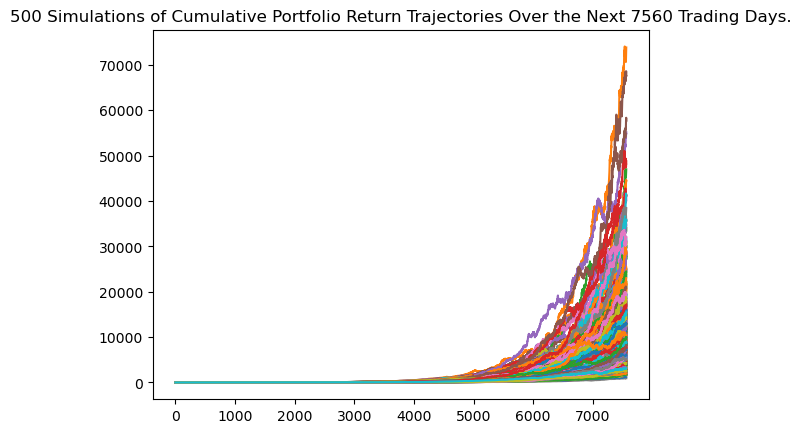

In [3]:
plots = sim_returns.plot_simulation() # To depict an image with simulation outcomes

In [4]:
# Fetch summary statistics from the Monte Carlo simulation results
all_stats = sim_returns.summarize_cumulative_return()

print(all_stats)

count             500.000000
mean            10670.179978
std              9252.242382
min               929.001474
25%              4932.313792
50%              8222.392480
75%             12953.953550
max             73836.048851
95% CI Lower     1911.850283
95% CI Upper    35629.757741
Name: 7560, dtype: float64


c:\Users\kahbe\Documents\GitHub\Investment-Chatbot\Monte Carlo Simulation\MCPortfolioSimulator_SR.py:171: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [5]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
port_high_return = round(initial_investment * all_stats[9],2) 
port_low_return = round(initial_investment * all_stats[8],2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${port_low_return} and ${port_high_return}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $38237005.66 and $712595154.82


In [5]:
import numpy as np

# Parameters
mean_annual_return = 0.07  # 7% mean annual return
std_dev_annual = 0.15      # 15% annual standard deviation
initial_investment = 20000
n_years = 30
n_trading_days = 252 * n_years
num_simulations = 1000  # Number of Monte Carlo simulations

# Convert annual return and standard deviation to daily
daily_return = (1 + mean_annual_return) ** (1 / 252) - 1
daily_std_dev = std_dev_annual / np.sqrt(252)

# Array to store the results of each simulation
future_values = np.zeros(num_simulations)

# Run multiple simulations
for i in range(num_simulations):
    daily_returns = np.random.normal(daily_return, daily_std_dev, n_trading_days)
    cumulative_return = np.cumprod(1 + daily_returns)[-1]  # Cumulative product of returns
    future_values[i] = initial_investment * cumulative_return

# Calculate the 95% confidence interval
ci_lower = np.percentile(future_values, 2.5)
ci_upper = np.percentile(future_values, 97.5)

print(f"Projected future value of the investment: ${np.mean(future_values):.2f}")
print(f"95% Confidence Interval: ${ci_lower:.2f} to ${ci_upper:.2f}")



Projected future value of the investment: $152364.19
95% Confidence Interval: $22725.76 to $586744.96


In [6]:
mean_value, ci_lower, ci_upper = sim_returns.simulate_long_term_investment(20000)

print(f"Projected future value of the investment: ${mean_value:.2f}")
print(f"95% Confidence Interval: ${ci_lower:.2f} to ${ci_upper:.2f}")

Projected future value of the investment: $147796.02
95% Confidence Interval: $22879.26 to $510407.99


In [6]:
initial_investment = 20000
num_years = 30
mean_annual_return = 0.07  # 7% mean annual return
std_dev_annual = 0.15 
mean_value, ci_lower, ci_upper, cumulative_returns = sim_returns.simulate_long_term_investment(initial_investment, mean_annual_return, std_dev_annual, num_years)
display(sim_returns.simulate_long_term_investment(initial_investment, mean_annual_return, std_dev_annual, num_years))

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

(151674.19753902458,
 25190.77041767066,
 527756.4018041147,
 array([[ 0.99372702,  0.98803322,  0.98940063, ...,  5.78138536,
          5.73748849,  5.79073113],
        [ 1.02431432,  1.01034544,  1.00778427, ..., 11.71812555,
         11.67739356, 11.63876859],
        [ 0.9951843 ,  0.98779425,  0.97244931, ...,  7.73735708,
          7.73697589,  7.75798076],
        ...,
        [ 0.99587323,  0.99147376,  1.00522771, ...,  6.01261818,
          6.03291458,  5.96610191],
        [ 0.99935289,  0.99566422,  1.002154  , ...,  1.26144241,
          1.26547425,  1.26601234],
        [ 1.00232298,  1.01810824,  1.01215411, ...,  9.9364284 ,
          9.96613489, 10.20975384]]))

In [7]:
print(f"Projected future value of the investment: ${mean_value:.2f}")
print(f"95% Confidence Interval: ${ci_lower:.2f} to ${ci_upper:.2f}")

Projected future value of the investment: $154633.67
95% Confidence Interval: $23016.96 to $496618.66


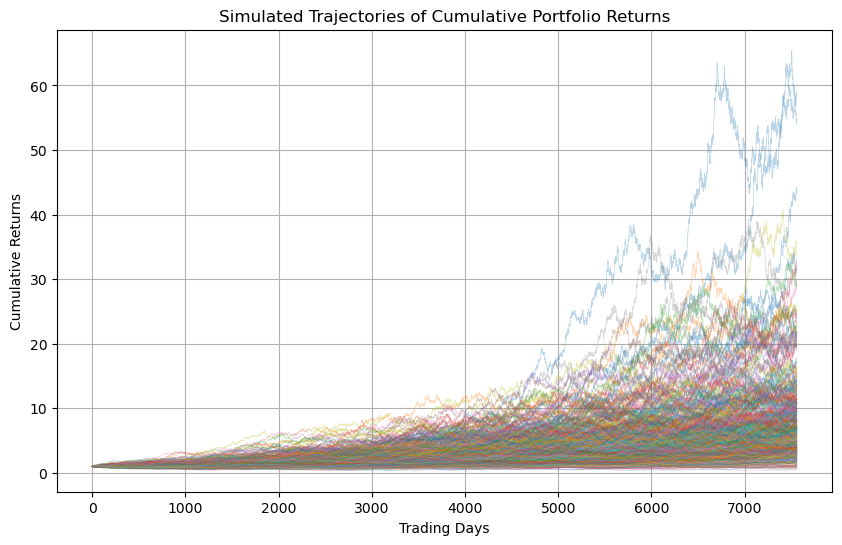

In [11]:
sim_returns.plot_simulation_trajectories(cumulative_returns)
